## 베이즈 정리

<br>

- **A사건이 일어난 후, B사건이 일어났다** 해보자.
- P(A)를 A사건이 일어날 확률이라 하자.
- 그럼, P(B)는 어떻게 정의할 수 있을까?
- $P(A) * P(B)$ 는 X. Why? A와 B는 독립사건이 아니니까.

<br>

- A가 일어났을 때 B가 일어날 확률은? $P(B|A)$.
- A와 B가 연달아 일어날 확률은? $P(A) * P(B|A) = P(A \cap B)$.
    - 이때, $P(A)$를 사전확률, $P(B|A)$를 사후확률 이라고 함.
    - A와 B가 동시에 일어날 확률로도 볼 수 있음.
    
<br>

$$P(A \cap B) = P(A) * P(B|A) = P(B) * P(A|B)$$

                                    이를 베이즈 정리라고 부름.
    
<br>

- 스펨메일 분류가 베이즈 정리를 사용하는 좋은 예시.
    - 광고 메일을 받았을 때, 이 광고가 스팸메일 일 확률?
    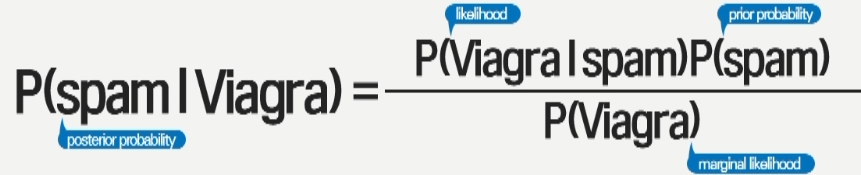
    - 확률이 높은 경우?
        - $P(스팸메일|광고)$, $P(스팸메일|수신동의)$같은 경우.
    - 확률이 낮은 경우?
        - $P(스팸메일|학습자료)$, $P(스팸메일|머신러닝)$같은 경우.
        
<br>

                          나이브-베이즈는 이런 원리를 이용해 분류를 하는 것.

## Naive-Bayes

<br>

- 여러개의 단어가 한꺼번에 메일에 포함. 이때 이 메일이 스팸메일인지 아닌지 어떻게 알 수 있을까?
- 스팸일 확률이 클지, 정상일 확률이 클지. How?
    - 동시다발적으로 발생할 확률을 구해야 한다.
    - 단, 구할 수 없는 확률은 똑같다고 가정하고 제거.
- 나이브-베이즈 : 아주 간단하게 만든다는 의미.

<br>

- $X = \{광고, 통계, 수신, 동의, 머신\}$ 이라고 할때, 이것이 스팸메일일 확률은 어떻게?
    - $P(스팸메일|X) = P(머신|스팸메일) * P(광고|스팸메일) * P(통계|스팸메일) * P(수신|스팸메일) * P(동의|스팸메일)$ 이런식으로 모든 조건부 확률을 곱하는 수 밖에...
- 마찬가지로 정상메일 일 확률도 동일하게 구할 수 있을 것.
- 정상메일일 확률 vs 스팸메일일 확률 대결, 확률이 높은 쪽이 우리가 원하는 클래스가 되는 것.
    - 멀티클래스 옵션을 통해 여러 클래스로 분류할 수도 있음.

<br>

- 이런식으로 긴 text도 단어를 쪼개서 **긍정/부정을 예측**하거나 **주제를 분류** 할 수가 있음.
- 이런 특성덕분에 텍스트 마이닝에서 많이 사용함.
- 간단하면서도 이해하기 쉽고, 강력한 성능을 지님.

**영화 댓글의 긍정/부정 찾기**

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import chardet # 문자열 인코딩 인식 라이브러리

# Data loading
with open('UseData/imdb_master.csv', 'rb') as f:
    result = chardet.detect(f.read())
train = pd.read_csv('UseData/imdb_master.csv', encoding=result['encoding'])
train.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [3]:
# 필요한건 review, label 컬럼. 이를 제외하고 제거.
train = train.drop(train.columns[[0, 1, 4]], axis=1)
train.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [4]:
# neg, pos를 숫자로 바꿔야 train을 할 수 있다. neg=0, pos=1로.
train['label'] = [(l!='neg')*1 for l in train['label']]
train.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [5]:
d = train
d.columns = ['user_review', 'positive']
d.head()

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(d['user_review'], d['positive'], test_size=0.2)

In [8]:
# 혹시 모르니...
split=0.7
d_train = d[:int(split*len(d))]
d_test = d[int((1-split)*len(d)):]

In [12]:
# Text의 빈도수 측정
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(X_train)
features

<80000x130650 sparse matrix of type '<class 'numpy.int64'>'
	with 11001671 stored elements in Compressed Sparse Row format>

In [13]:
# 혹시 모르니...
vectorizer2 = CountVectorizer()
features_d = vectorizer2.fit_transform(d_train['user_review'])
features_d

<70000x121229 sparse matrix of type '<class 'numpy.int64'>'
	with 9598445 stored elements in Compressed Sparse Row format>

In [14]:
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

(130650,
 ['00',
  '000',
  '00000000000',
  '0000000000000000000000000000000001',
  '0000000000001',
  '000000001',
  '000000003',
  '00000001',
  '000001745',
  '00001',
  '0001',
  '00015',
  '0002',
  '0007',
  '00083',
  '000dm',
  '000ft',
  '000s',
  '000th',
  '000â',
  '001',
  '002',
  '003',
  '003830',
  '004',
  '005',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '008',
  '0080',
  '0083',
  '009',
  '0091042',
  '0093638',
  '00am',
  '00o',
  '00pm',
  '00s',
  '01',
  '0126',
  '0148',
  '015',
  '019',
  '01p',
  '02',
  '022',
  '0230',
  '029',
  '03',
  '0312',
  '039',
  '04',
  '041',
  '044',
  '05',
  '050',
  '06',
  '0615',
  '06th',
  '07',
  '07am',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0911012996',
  '098',
  '0and',
  '0f',
  '0n',
  '0ne',
  '0out',
  '0r',
  '0s',
  '10',
  '100',
  '1000',
  '10000',
  '100000',
  '1000000',
  '10000000000',
  '10000000000000',
  '1000s',
  '1000th',
  '1000x',
  '1001',
  '1004',
  '100

In [15]:
len(vectorizer2.get_feature_names()), vectorizer2.get_feature_names()

(121229,
 ['00',
  '000',
  '0000',
  '00000000000',
  '0000000000001',
  '000000003',
  '00000001',
  '00001',
  '0001',
  '00015',
  '000dm',
  '000s',
  '000â',
  '001',
  '002',
  '003',
  '003830',
  '004',
  '005',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '008',
  '0080',
  '0083',
  '009',
  '0091042',
  '0093638',
  '00am',
  '00o',
  '00pm',
  '00s',
  '00schneider',
  '01',
  '0126',
  '0148',
  '019',
  '01pm',
  '02',
  '020410',
  '022',
  '0230',
  '0267',
  '029',
  '03',
  '0312',
  '039',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '0615',
  '06th',
  '07',
  '07am',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0and',
  '0f',
  '0ne',
  '0r',
  '0s',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '100000',
  '1000000',
  '10000000000',
  '10000000000000',
  '10000th',
  '1000lb',
  '1000s',
  '1000th',
  '1000x',
  '1001',
  '1003',
  '1004',
  '100b',
  '100bt',
  '100ft',
  '100ibs',
  '100k',
  '100m',
  '100mi

     각각 13만건, 12만건의 단어사전이 만들어 졌음.

In [16]:
# 3만건에서 100번째 칸 까지 확인해보자.
i = 30000
j = 100
words = vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10, i:i+30].todense(), columns=words)

,deducing,deduct,deducted,deducting,deduction,deductions,deductive,deductments,dee,deece,...,deeepaa,deejay,deem,deemed,deemer,deeming,deemphasizing,deems,deen,deena
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
words2 = vectorizer2.get_feature_names()[i:i+30]
pd.DataFrame(features_d[j:j+10, i:i+30].todense(), columns=words2)

,dimanche,dimartino,dimas,dimbleby,dimbulb,dime,dimeco,dimension,dimensional,dimensionality,...,diminution,diminutive,dimitri,dimitriades,dimitrij,dimitrios,dimitrius,dimitrova,dimitru,dimitry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
print(words)
print(words2)

['deducing', 'deduct', 'deducted', 'deducting', 'deduction', 'deductions', 'deductive', 'deductments', 'dee', 'deece', 'deed', 'deedee', 'deeding', 'deedles', 'deedlit', 'deeds', 'deeee', 'deeeeeep', 'deeeeep', 'deeemed', 'deeepaa', 'deejay', 'deem', 'deemed', 'deemer', 'deeming', 'deemphasizing', 'deems', 'deen', 'deena']
['dimanche', 'dimartino', 'dimas', 'dimbleby', 'dimbulb', 'dime', 'dimeco', 'dimension', 'dimensional', 'dimensionality', 'dimensionally', 'dimensionless', 'dimensions', 'dimentional', 'dimes', 'dimestore', 'diminish', 'diminished', 'diminishes', 'diminishing', 'diminution', 'diminutive', 'dimitri', 'dimitriades', 'dimitrij', 'dimitrios', 'dimitrius', 'dimitrova', 'dimitru', 'dimitry']


In [22]:
# 나이브-베이즈를 이용한 분류
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, Y_train)
pred1 = model1.predict_proba(vectorizer.transform(X_test))
pred1, pred1.shape

(array([[9.99518144e-01, 4.81856129e-04],
        [2.22057206e-12, 1.00000000e+00],
        [2.77262843e-06, 9.99997227e-01],
        ...,
        [9.99498488e-01, 5.01512115e-04],
        [7.01673009e-30, 1.00000000e+00],
        [3.43401306e-06, 9.99996566e-01]]), (20000, 2))

In [26]:
# 혹시모르니...
model2 = MultinomialNB()
model2.fit(features_d, d_train['positive'])
pred2 = model2.predict_proba(vectorizer2.transform(d_test['user_review']))
pred2, pred2.shape

(array([[1.00000000e+00, 1.89777939e-11],
        [9.99999967e-01, 3.29460894e-08],
        [9.99885531e-01, 1.14468753e-04],
        ...,
        [1.00000000e+00, 4.71360351e-10],
        [7.08223976e-01, 2.91776024e-01],
        [1.44847203e-12, 1.00000000e+00]]), (70000, 2))

    각각 Neg, Pos일 확률이 나뉜 것.

In [31]:
# ROC Curve를 한번 그려서 모델을 평가해보자.
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

def performance(y_true, pred, color='g', ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5) # 긍정일 확률 확인. 1일 확률이 0.5보다 큰지?
    auc = roc_auc_score(y_true, pred[:,1]) # ROC의 AUC값 계산
    # 혼동행렬 평가지표를 이용해 roc_curve 그리기
    fpr, tpr, thr = roc_curve(y_true, pred[:,1]) 
    plot(fpr, tpr, color, linewidth='3')
    xlabel('False positive rate')
    ylabel('True positive rate')
    if ann:
        annotate('Acc: %0.2f' % acc, (0.1, 0.8), size=14)
        annotate('AUC: %0.2f' % auc, (0.1, 0.7), size=14)

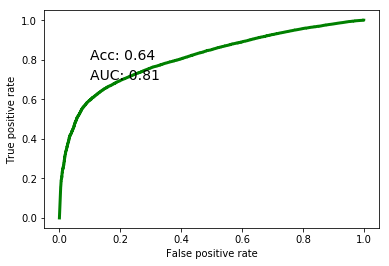

In [32]:
performance(d_test['positive'], pred2)

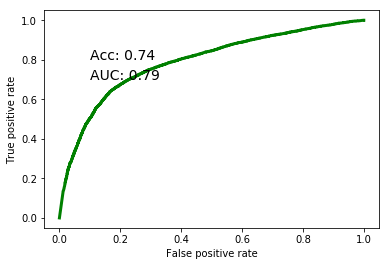

In [33]:
performance(Y_test, pred1)

    실제 관측값(test)과 예측값(pred)을 비교.
    train_test_split써서 찢은게 정확도는 더 높게나오긴 한다?

**랜덤 데이터를 이용해 예측해보기**

In [34]:
import numpy as np

X = np.random.randint(5, size=(6, 100))
Y = np.array([1,2,3,4,5,6])
print(X)
print(Y)

[[2 1 0 1 1 3 4 0 0 4 3 1 3 1 1 3 1 1 3 1 3 3 2 4 2 3 1 2 1 3 0 4 0 1 0 1
  2 1 4 2 0 2 0 2 0 0 1 1 2 2 2 2 1 0 3 0 2 4 2 3 0 3 1 2 1 0 1 1 3 2 0 0
  4 1 0 4 4 1 3 3 4 2 0 2 0 1 3 3 0 2 4 3 2 3 1 2 3 4 0 1]
 [0 3 2 1 2 3 4 1 1 2 0 4 1 0 3 4 1 2 2 0 2 0 1 2 0 3 4 0 4 0 1 2 2 3 0 1
  1 2 3 3 4 2 2 0 1 2 4 0 3 3 3 3 1 4 2 0 4 2 2 3 2 3 3 4 1 2 1 2 0 3 4 2
  1 3 3 1 3 3 1 2 1 0 2 2 1 2 0 4 4 0 0 1 1 1 4 3 0 0 4 3]
 [3 0 0 4 2 2 1 1 4 0 2 3 1 4 4 0 3 1 0 1 3 0 0 1 3 0 3 4 1 2 1 2 4 2 4 0
  0 0 4 4 3 1 2 1 2 3 4 1 4 1 4 2 3 3 4 2 0 2 0 2 4 4 4 1 1 2 0 3 4 1 2 1
  3 0 4 0 0 0 3 2 0 2 4 1 3 2 3 4 2 2 1 4 2 2 4 3 2 2 3 4]
 [3 0 1 3 4 0 1 4 2 4 2 4 3 1 3 4 2 4 3 1 0 1 3 4 1 3 1 2 0 0 3 0 0 4 0 2
  0 4 4 2 0 2 0 0 4 2 3 0 3 4 3 3 2 1 1 4 0 4 4 2 4 1 1 1 2 2 3 4 0 1 2 2
  2 2 3 2 4 1 1 1 1 2 0 0 0 3 0 2 4 3 2 4 3 0 4 0 0 0 2 3]
 [4 0 3 1 3 2 0 4 1 0 0 1 1 2 1 1 4 3 3 3 0 2 2 0 4 2 3 0 2 1 2 3 3 1 1 3
  3 2 3 1 2 0 2 2 3 3 2 4 3 4 3 1 3 3 2 4 1 4 3 0 4 0 0 3 0 0 3 2 2 4 1 2
  2 3 4 1 1 0 2 3 1 3 2 

In [35]:
model = MultinomialNB()
model.fit(X,Y)

MultinomialNB()

In [36]:
# 4번째 데이터의 class 예측?
print(model.predict(X[3].reshape(1,100)))

[4]


In [37]:
model.predict(X)

array([1, 2, 3, 4, 5, 6])

    실제 Y와 일치한다.